0 0.6906448006629944
1 0.6869552135467529
2 0.6835715770721436
3 0.6804681420326233
4 0.6776213645935059
5 0.6750094890594482
6 0.6726127862930298
7 0.6704131960868835
8 0.6683940887451172
9 0.6665403842926025
10 0.6648381352424622
11 0.6632748246192932
12 0.6618387699127197
13 0.6605194211006165
14 0.6593070030212402
15 0.6581928730010986
16 0.6571685671806335
17 0.6562269330024719
18 0.6553611159324646
19 0.6545648574829102
20 0.6538323760032654
21 0.6531585454940796
22 0.6525385975837708
23 0.6519680619239807
24 0.6514429450035095
25 0.6509596705436707
26 0.6505146026611328
27 0.6501049399375916
28 0.6497275829315186
29 0.6493801474571228
30 0.6490600109100342
31 0.6487652063369751
32 0.6484934687614441
33 0.6482431292533875
34 0.6480123996734619
35 0.6477997899055481
36 0.6476038098335266
37 0.6474230885505676
38 0.6472565531730652
39 0.6471030116081238
40 0.6469613909721375
41 0.6468307375907898
42 0.6467102766036987
43 0.6465991139411926
44 0.6464966535568237
45 0.64640212059021


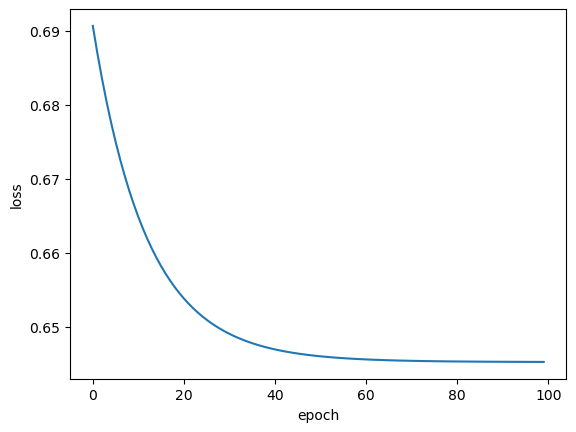

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()
 
 
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()